In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/elcan/Documents/code/gradipy'
sys.path.append(path)
from gradipy.tensor import Tensor
from gradipy import nn, datasets
%matplotlib inline

In [8]:
# hyperparameters
input_dim = 28*28
output_dim = 10
hidden_dim = 128
lr = 0.01
epochs = 1000
batch_size = 128

In [9]:
# load dataset
X_train, y_train, X_val, y_val, X_test, y_test = datasets.MNIST(path='../data/mnist_data')
# init weights
W1 = nn.init_kaiming_normal(input_dim, hidden_dim, nonlinearity='relu')
W2 = nn.init_kaiming_normal(hidden_dim, output_dim, nonlinearity='relu')
# loss function
losses, accuracies = [], []
criterion = nn.CrossEntropyLoss()
optimizer = nn.SGD([W1, W2], lr=lr)

In [10]:
for epoch in range(epochs):
  
  # reset gradient
  optimizer.zero_grad()

  # mini-batch
  ixs = np.random.randint(X_train.shape[0], size=batch_size)
  xs = Tensor(X_train[ixs])
  ys = y_train[ixs]
  n = xs.shape[0]
  
  # forward pass
  z = xs @ W1
  a = z.relu()
  logits = a @ W2

  # backward pass
  loss = criterion(logits, ys)
  loss.backward()
  losses.append(loss.data)

  optimizer.step()
  
  if epoch % 20 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.data:.4f}")
#   break

Epoch [1/1000], Loss: 2.4805
Epoch [21/1000], Loss: 0.9424
Epoch [41/1000], Loss: 0.7584
Epoch [61/1000], Loss: 0.4262
Epoch [81/1000], Loss: 0.4209
Epoch [101/1000], Loss: 0.4790
Epoch [121/1000], Loss: 0.5269
Epoch [141/1000], Loss: 0.3883
Epoch [161/1000], Loss: 0.3199
Epoch [181/1000], Loss: 0.3206
Epoch [201/1000], Loss: 0.3612
Epoch [221/1000], Loss: 0.3182
Epoch [241/1000], Loss: 0.2921
Epoch [261/1000], Loss: 0.2807
Epoch [281/1000], Loss: 0.2577
Epoch [301/1000], Loss: 0.3068
Epoch [321/1000], Loss: 0.2391
Epoch [341/1000], Loss: 0.2666
Epoch [361/1000], Loss: 0.4678
Epoch [381/1000], Loss: 0.3368
Epoch [401/1000], Loss: 0.3782
Epoch [421/1000], Loss: 0.3168
Epoch [441/1000], Loss: 0.3119
Epoch [461/1000], Loss: 0.3245
Epoch [481/1000], Loss: 0.3408
Epoch [501/1000], Loss: 0.3050
Epoch [521/1000], Loss: 0.1809
Epoch [541/1000], Loss: 0.2522
Epoch [561/1000], Loss: 0.3150
Epoch [581/1000], Loss: 0.2786
Epoch [601/1000], Loss: 0.3585
Epoch [621/1000], Loss: 0.2254
Epoch [641/100

In [11]:
def forward(X):
  X = Tensor(X)
  z = X @ W1
  a = z.relu()
  logits = a @ W2
  logprobs = logits.softmax().log()
  return logprobs

def evaluate(split):
  X, y = {
    'train': (X_train, y_train),
    'val': (X_val, y_val)
  }[split]
  logprobs = forward(X)
  loss = -logprobs.data[range(X.shape[0]), y].mean()
  accuracy = (np.argmax(logprobs.data, axis=1) == y).astype(float).mean()
  print(split, loss, accuracy)

evaluate('train')
evaluate('val')

train 0.20321539 0.94222
val 0.21562849 0.9372


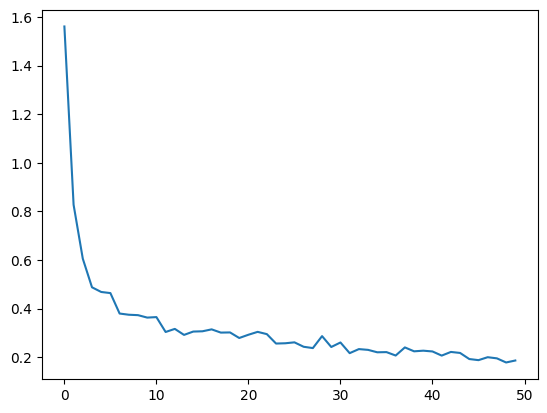

In [12]:
plt.plot(np.array(losses).reshape(-1, 20).mean(1))
plt.plot(np.array(accuracies).reshape(-1, 10).mean(1))

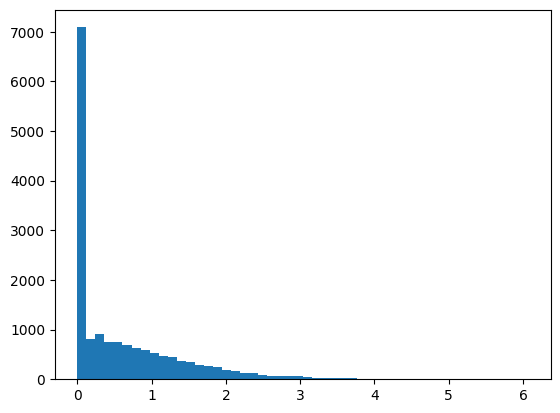

In [13]:
plt.hist(a.data.reshape(-1), 50);

In [14]:
(2 / input_dim) ** 0.5

0.050507627227610534

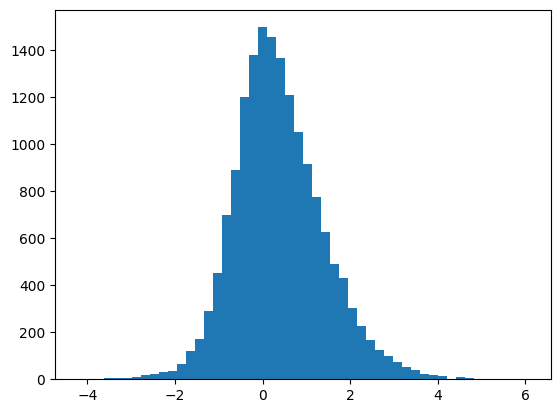

In [15]:
plt.hist(z.data.reshape(-1), 50);

In [17]:
a.shape

(128, 128)

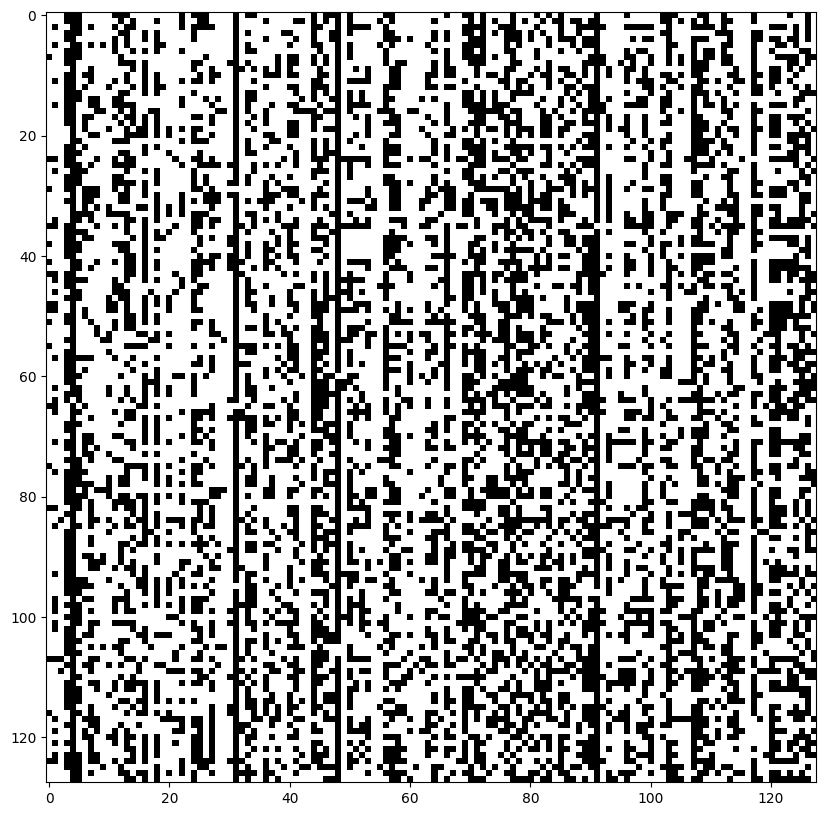

In [16]:
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(a.data > 0), cmap='gray', interpolation='nearest')

In [23]:
Tensor(1 / 10).log()

Tensor(-2.3025851249694824)

In [20]:
# DONE: complete all the basic operations. Pay attention to the data type (for ex mul, sub)
# DONE: clean up everything so far implemented and push to repo
# implement loss (rather than probs.backward())

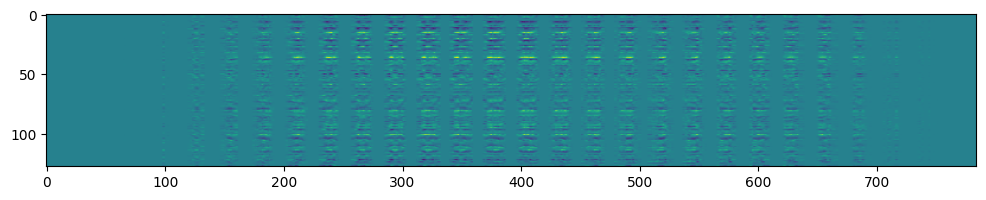

In [24]:
plt.figure(figsize=(12, 6))
plt.imshow(W1.grad.T)

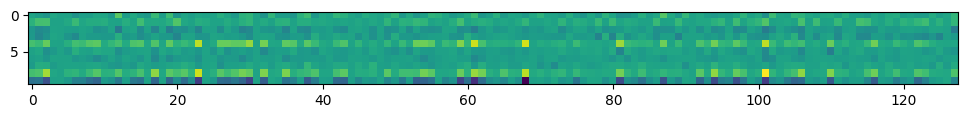

In [25]:
plt.figure(figsize=(12, 6))
plt.imshow(W2.grad.T)

In [26]:
np.count_nonzero(W2.grad == 0) / W2.grad.size

0.0

In [27]:
np.count_nonzero(W1.grad == 0) / W1.grad.size

0.36526426977040816